In [25]:
from model import ScaleAdaptiveNet
import matplotlib.pyplot as plt
from data import spectralloader
from tqdm import tqdm
import numpy as np
import torch
from config import ORDER,STRAINS

In [26]:
device = 'cuda:0'
batch_size=100

In [27]:
net = ScaleAdaptiveNet(30)
net.load_state_dict(torch.load('param/30/finetune/1.pth'))
t = spectralloader('test',batch_size=batch_size,num_workers=12)

In [31]:
data_all = np.zeros((3000,1000))
cam_all = np.zeros((3000,1000))
label_all = np.zeros(3000)
for i,(data,target) in enumerate(tqdm(t)):
    data_all[i*100:(i+1)*100]=data.view(batch_size,1000).detach().numpy()
    cam = net.getgradCAM(data,target)
    cam_all[i*100:(i+1)*100] = cam.view(batch_size,1000).detach().numpy()
    label_all[i*100:(i+1)*100] = target.view(-1).detach().numpy()
data_all = np.concatenate([data_all[o*100:(o+1)*100] for o in ORDER],axis=0)
cam_all = np.concatenate([cam_all[o*100:(o+1)*100] for o in ORDER],axis=0)
label_all = np.concatenate([label_all[o*100:(o+1)*100] for o in ORDER],axis=0)

100%|██████████| 30/30 [00:10<00:00,  2.79it/s]


2020


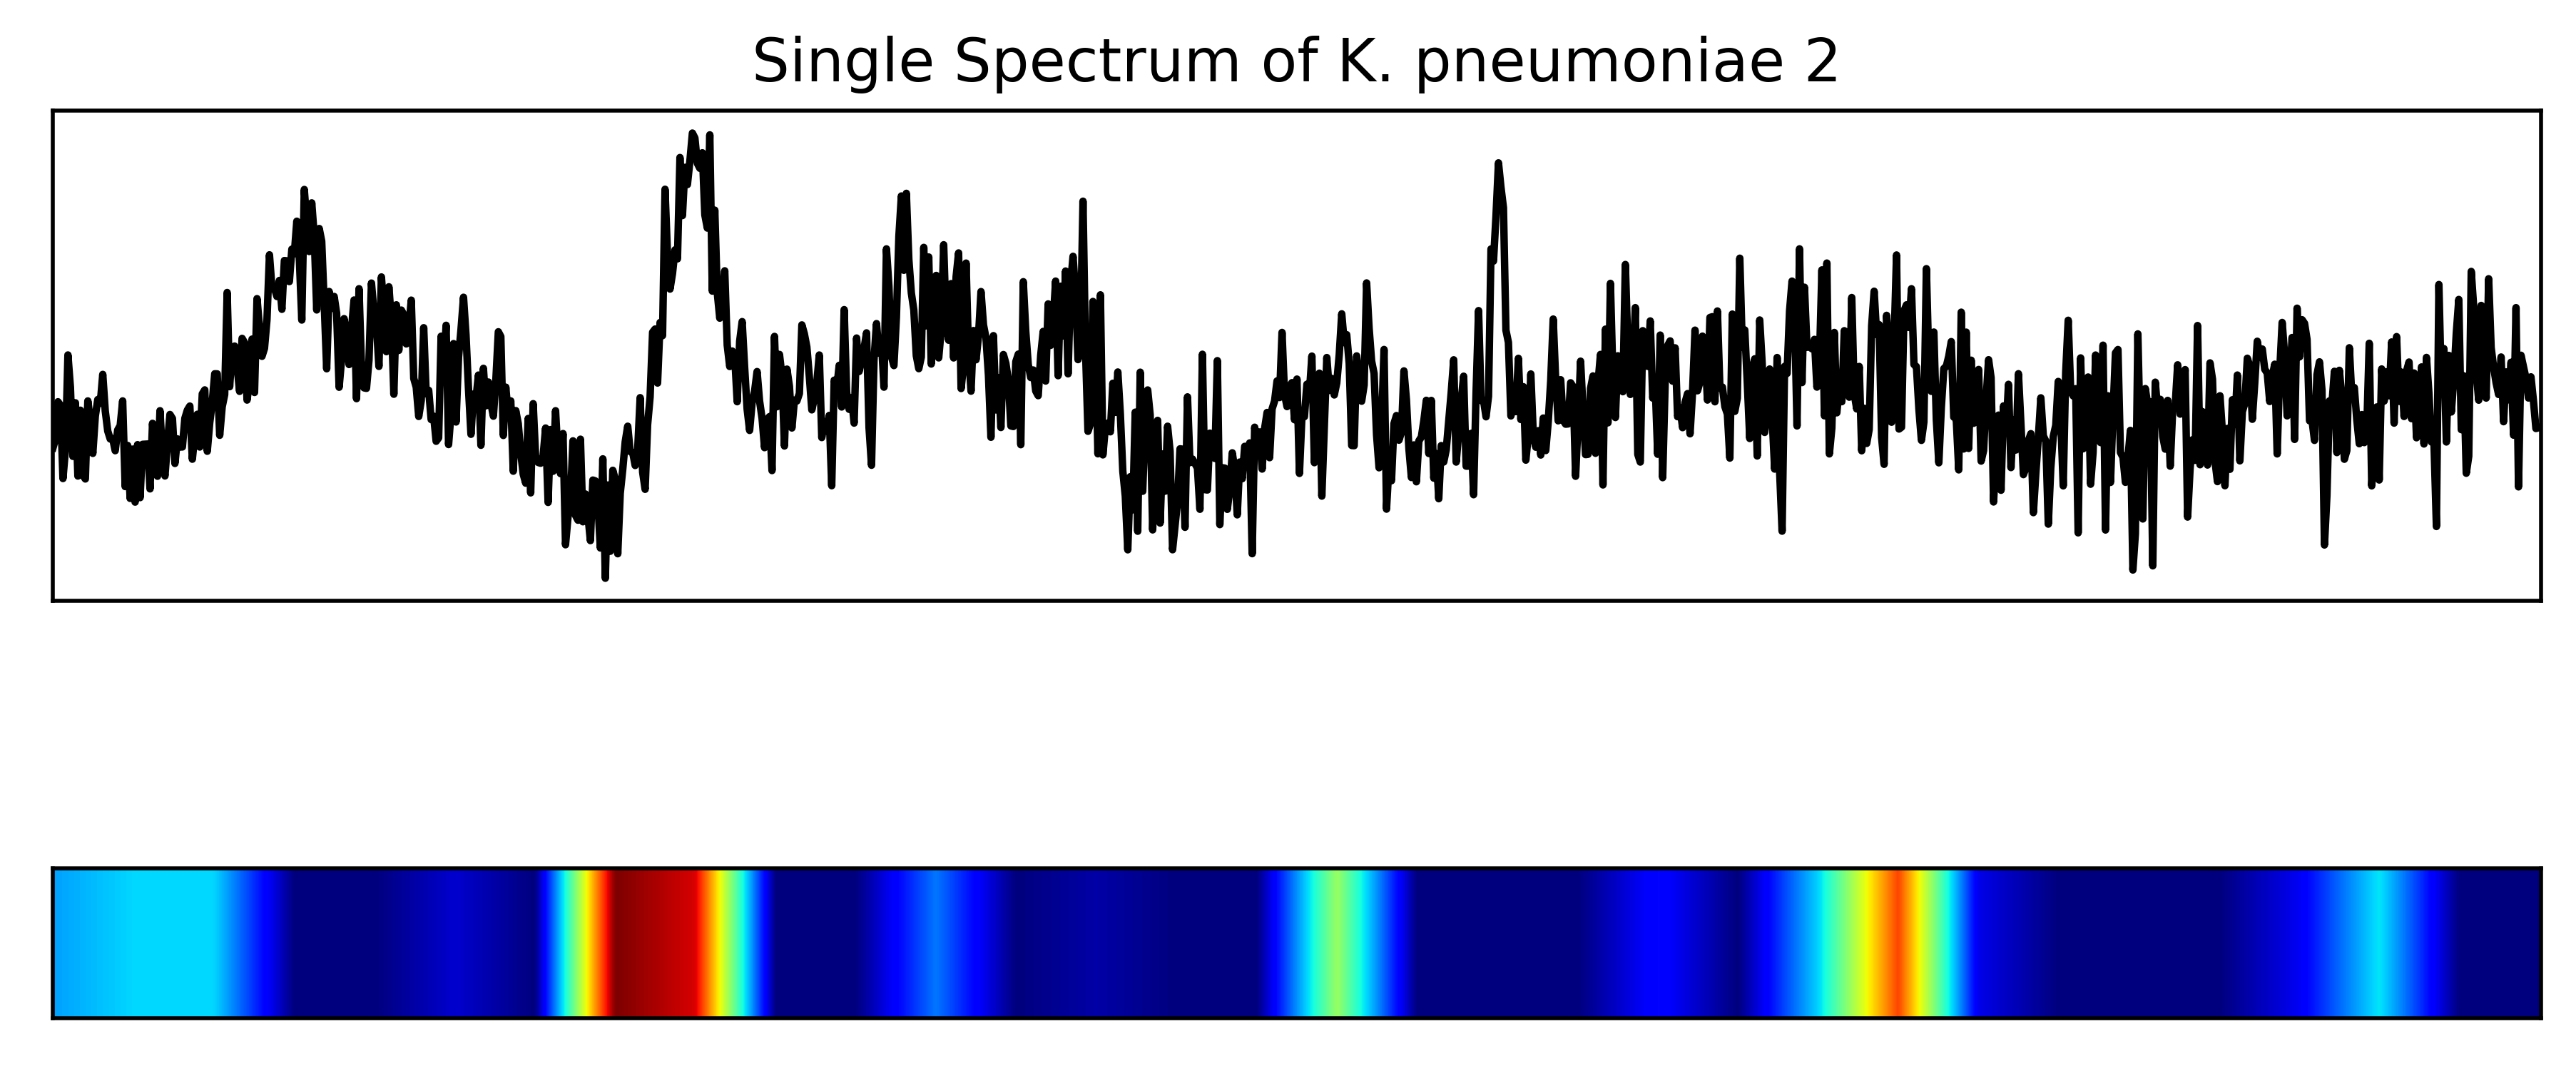

In [38]:
id = np.random.randint(0,3000)
print(id)
data_single = data_all[id]
cam_single = cam_all[id]
cam_single = np.concatenate(([[cam_single] for i in range(60)]),axis=0)
plt.subplots(2, 1, sharex=True, facecolor='white', figsize=(9, 4), dpi=500)
ax1 = plt.subplot(2,1,1)
plt.plot(data_single,color='black')
plt.title('Single Spectrum of '+STRAINS[label_all[id]])
plt.xticks([])
plt.yticks([])
plt.xlim(0, 1000)#
ax2=plt.subplot(2, 1, 2)
plt.yticks([])
plt.xticks([])
plt.imshow(cam_single,interpolation='bilinear', cmap='jet')
plt.show()